In [125]:
import sys
import numpy as np
import sys
print(sys.version)

from openLoop.utilities.ipynb.displays import *
from openLoop.utilities.ipynb.filters import *
from openLoop.utilities.ipynb.hdf import *
#from YALL.utilities.tabulate import tabulate

from declarative import (
  OverridableObject, mproperty
)

import sympy
from openLoop.utilities.ipynb.displays import *
from openLoop.utilities.ipynb.ipy_sympy import *
import scipy.linalg

3.5.2 (default, Sep 14 2016, 11:28:32) 
[GCC 6.2.1 20160901 (Red Hat 6.2.1-1)]


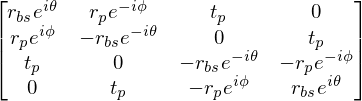

In [164]:
r,t,rbs = sympy.var('r, t, r_bs', real = True)
a,b,c,d = sympy.var('a,b,c,d')
#rbs = 0
a,b,c,d = 1,-1,-1,1
#r = sympy.sqrt(1 - t**2)
rp = sympy.var('r_p', real = True)# r * sympy.sqrt(1 - rbs**2)
tp = sympy.var('t_p', real = True)# t * sympy.sqrt(1 - rbs**2)
theta = sympy.var('theta', real = True)# t * sympy.sqrt(1 - rbs**2)
X = sympy.exp(sympy.I * theta)
Xc = X.conjugate()

theta = sympy.var('phi', real = True)# t * sympy.sqrt(1 - rbs**2)
Y = sympy.exp(sympy.I * phi)
Yc = Y.conjugate()

R_matInner = sympy.Matrix([
    [a*rbs,  rp,    tp,     0],
    [rp,     b*rbs, 0,        tp],
    [tp,     0,        c*rbs, -rp], 
    [0,      tp,    -rp,    d*rbs],
])
Rl_matY = sympy.Matrix([
    [Yc,0,0,0],
    [0,1,0,0],
    [0,0,Yc,0],
    [0,0,0,1],
])
Rr_matY = sympy.Matrix([
    [Y,0,0,0],
    [0,1,0,0],
    [0,0,Y,0],
    [0,0,0,1],
])
Rl_matX = sympy.Matrix([
    [X,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,X],
])
Rr_matX = sympy.Matrix([
    [1,0,0,0],
    [0,Xc,0,0],
    [0,0,Xc,0],
    [0,0,0,1],
])
R_mat = Rl_matX *Rl_matY * R_matInner * Rr_matY * Rr_matX
R_mat

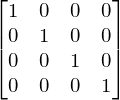

In [165]:
M = (R_mat.transpose().conjugate() * R_mat)
M = M.subs(rp, r * sympy.sqrt(1 - rbs**2))
M = M.subs(tp, t * sympy.sqrt(1 - rbs**2))
M = M.subs(r, sympy.sqrt(1 - t**2))
M.simplify()
M

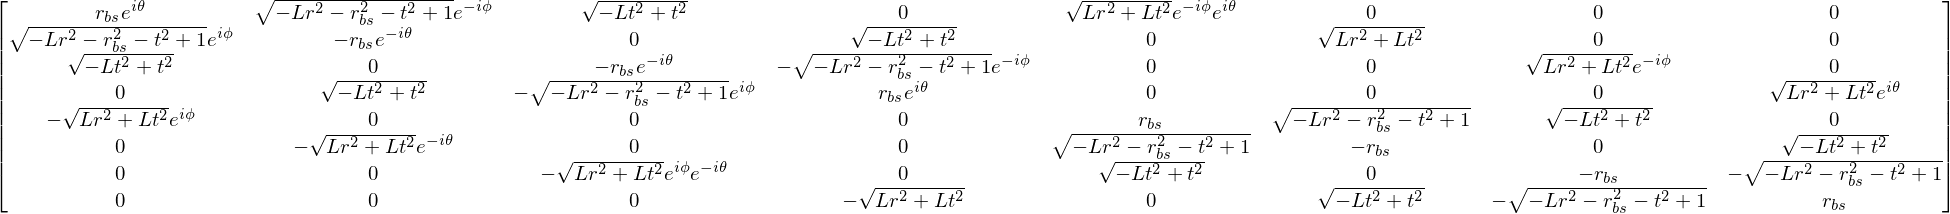

In [166]:
R_matInner = sympy.Matrix([
    [a*rbs,  rp,     tp,     0],
    [rp,     b*rbs, 0,         tp],
    [ tp,     0,        c*rbs, -rp], 
    [0,       tp,    -rp,    d*rbs],
])
I4 = sympy.eye(4)
O4 = sympy.zeros(4)
Lt  = sympy.var('Lt', real = True)
Lr  = sympy.var('Lr', real = True)
Lx  = sympy.var('Lx', real = True)
rL = sympy.var('r_L', real = True)
tL = sympy.var('t_L', real = True)
def enlarge(mat):
    return sympy.Matrix(numpy.bmat([[mat, O4],[O4, I4]]))
R_matBig = sympy.Matrix(numpy.bmat([[R_matInner, Lx*I4],[-Lx*I4, R_matInner]]))

R_matBig
R_mat = enlarge(Rl_matX) * enlarge(Rl_matY) * R_matBig * enlarge(Rr_matY) * enlarge(Rr_matX)
M = R_mat
#R_mat = R_matBig
M = M.subs(Lx, sympy.sqrt(Lt**2 + Lr**2))
M = M.subs(tp, sympy.sqrt(t**2 - Lt**2))
M = M.subs(rp, sympy.sqrt(r**2 - Lr**2 - rbs**2))
M = M.subs(r, sympy.sqrt(1 - t**2))
M

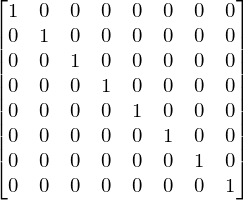

In [167]:
M = (R_mat.transpose().conjugate() * R_mat)
M = M.subs(Lx, sympy.sqrt(Lt**2 + Lr**2))
M = M.subs(tp, sympy.sqrt(t**2 - Lt**2))
M = M.subs(rp, sympy.sqrt(r**2 - Lr**2 - rbs**2))
M = M.subs(r, sympy.sqrt(1 - t**2))
#M = M.expand()
M.simplify()
M